# Sélection des colonnes

In [1]:
# Render our plots inline            #si pb : recherche sur google: modification de l'objet===l'objet====librairie===python
%matplotlib inline
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import seaborn as sns
from pandas.api.types import CategoricalDtype

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2
plt.rcParams['figure.figsize'] = (7, 5) #(L,l)


In [2]:
raw_data = pd.read_csv("en.openfoodfacts.org.products.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
df_copie = raw_data.copy()

print("df_copie:", df_copie.shape)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,47,52,64,79,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


df_copie: (1714376, 184)


[Index(['brand_owner', 'packaging', 'packaging_tags', 'calcium_100g',
        'cholesterol_100g', 'trans-fat_100g', 'iron_100g', 'vitamin-c_100g',
        'stores', 'vitamin-a_100g', 'allergens', 'purchase_places',
        'energy-kj_100g', 'traces_tags', 'traces_en', 'generic_name',
        'emb_codes', 'emb_codes_tags', 'manufacturing_places',
        'manufacturing_places_tags', 'traces', 'potassium_100g', 'origins',
        'origins_en', 'origins_tags', 'cities_tags', 'first_packaging_code_geo',
        'polyunsaturated-fat_100g', 'monounsaturated-fat_100g',
        'ingredients_that_may_be_from_palm_oil_tags', 'vitamin-pp_100g',
        'vitamin-b1_100g', 'vitamin-b2_100g', 'alcohol_100g'],
       dtype='object'),
 Index(['additives_n', 'ingredients_that_may_be_from_palm_oil_n',
        'ingredients_from_palm_oil_n', 'ingredients_text',
        'image_ingredients_small_url', 'image_ingredients_url',
        'nutrition-score-fr_100g', 'nutriscore_grade', 'nutriscore_score',
       

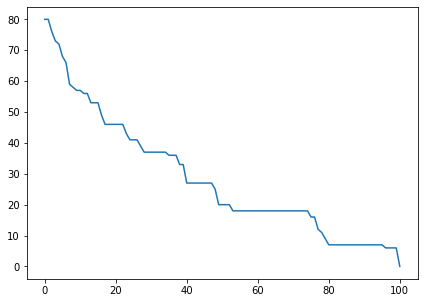

In [3]:
plt.rcParams['figure.figsize'] = (7, 5) #(L,l)
#FEATURE SELECTION (0)


#.sum() / df_copie.shape[0] == .mean()
completude_cols = (df_copie.notna().sum() / df_copie.shape[0] *100 ).sort_values(ascending = False)
completude_cols2 = completude_cols.iloc[9:,]  #enlèveles colonnes  100% de complétude == queus e de distribution droite
completude_cols3 = completude_cols2[completude_cols2 > 1] # on enlève la queue de distribution gauche

#nombre optimal de colonne en fonction du % de completude
plt.plot(range(0,101),[completude_cols3[completude_cols3 > x].shape[0] for x in range(0,101)])

#Colonnes classees par classes de taux de complétude
def triage(ser):       #pnns_groups_21 > categories_en !  
    groupe80 = ser[ser > 80].index          
    groupe60 = ser[(ser > 60) & (ser <= 80)].index
    groupe40 = ser[(ser > 40) & (ser <= 60)].index
    groupe20 = ser[(ser > 20) & (ser <= 40)].index
    groupe00 = ser[ser <= 20].index
    return [groupe00, groupe20, groupe40, groupe60, groupe80]

triage(completude_cols3)                 

Les varariables du Nutriscore : 

- Calories (Kcal/KJ)
- Amount of fat (g)
- Amount of saturated fatty acids (g)
- Amount of carbohydrates (g)
- Amount of sugars (g)
- Amount of protein (g)
- Amount of salt (mg)
- Fibre (g)

In [114]:
def str_concat(df,col1,col2):
    
    df['pnns_groups_21']  = df[col2].str.cat(df[col1],sep=", ")
    #s = df['pnns_groups_21'] 
    df.loc[pd.isnull(df_copie2.pnns_groups_21), 'pnns_groups_21'] = df[col2]
    df = df.drop(labels = [col1, col2],axis=1)
    
    return df

bonnes_cols = [ "brands_tags","countries_en","product_name"]
bonnes_cols += ["energy_100g",\
                "energy-kj_100g",\
                "energy-kcal_100g", \
                "proteins_100g",\
                "fat_100g", \
                "carbohydrates_100g", \
                "sugars_100g", \
                "salt_100g",\
                "sodium_100g",\
                "saturated-fat_100g", \
                "fiber_100g"]
bonnes_cols += ["nutriscore_score", "nutriscore_grade"]
bonnes_cols += ['sugcar_pct', 'satfat_pct']
bonnes_cols += ['pnns_groups_21' ]

In [115]:
#Application

# FEATURES GENERATION: [sugcar_pct] et [satfat_pct] et ['pnns_groups_21']
df_copie1 = df_copie
for sub_cat,cat in [["sugars_100g", "carbohydrates_100g"], ["saturated-fat_100g", "fat_100g"]]:
    # pour le nom de la colonne               #  valeur
    df_copie1[sub_cat[:3] + cat[:3] + "_pct"] = df_copie1[sub_cat] / df_copie[cat]

# ['pnns_groups_21']
df_copie2 =  df_copie1.copy()    
df_copie2 = str_concat(df_copie2,'pnns_groups_1','pnns_groups_2') 


#FEATURE SELECTION 
df_copie3 = df_copie2.copy()
df_copie3 = df_copie3.dropna(axis="columns", how="all") 
df_copie4 = df_copie3[bonnes_cols]

print("df_copie1:", df_copie1.shape) #(1714376, 186)
print("df_copie2:", df_copie2.shape)  # (1714376, 185)  
print('df_copie3:',df_copie3.shape)
print('df_copie4:',df_copie4.shape)

df_copie1: (1714376, 186)
df_copie2: (1714376, 185)
df_copie3: (1714376, 179)
df_copie4: (1714376, 19)


In [116]:
#Colonne - fin
df_copie4.to_csv('openfoodfacts_colonnes.csv',sep="\t",encoding='utf-8',index=False)

In [158]:
df = pd.read_csv("openfoodfacts_colonnes.csv",sep="\t",encoding='utf-8')
df = df.dropna(axis=0, how='any')
df[df["countries_en"].str.contains(",")].head()

,brands_tags,countries_en,product_name,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,fiber_100g,nutriscore_score,nutriscore_grade,sugcar_pct,satfat_pct,pnns_groups_21
392,kazidomi,"Belgium,France",Pesto à La Roquette Bio Kazidomi,2318.0,2318.0,561.0,8.2,53.2,11.7,0.5,2.7,1.08,9.6,1.3,23.0,e,0.04,0.18,"Dressings and sauces, Fat and sauces"
394,kazidomi,"Belgium,France",Crème d'Artichaut Bio Kazidomi,1104.0,1104.0,268.0,1.9,27.4,1.8,0.0,2.7,1.08,3.9,3.5,11.0,d,0.00,0.14,"Salty and fatty products, Salty snacks"
954,kazidomi,"Belgium,France",Sauce Tomate Aux Champignons Bio Kazidomi,212.0,212.0,51.0,1.7,2.3,4.8,4.0,0.7,0.28,0.4,1.6,-4.0,a,0.83,0.17,"Dressings and sauces, Fat and sauces"
955,kazidomi,"Belgium,France",Sauce Tomate Puttanesca Bio Kazidomi,310.0,310.0,75.0,1.5,5.2,4.3,3.8,0.2,0.08,0.8,1.7,-6.0,a,0.88,0.15,"Dressings and sauces, Fat and sauces"
956,kazidomi,"Belgium,France",Sauce Tomate Aux Courgettes Bio Kazidomi,232.0,232.0,56.0,1.5,3.2,4.2,4.0,0.7,0.28,1.0,2.0,-4.0,a,0.95,0.31,"Dressings and sauces, Fat and sauces"


# Nettoyage Colonnes et Doublons

In [8]:
# Render our plots inline            #si pb : recherche sur google: modification de l'objet===l'objet====librairie===python
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from pandas.api.types import CategoricalDtype



pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2
plt.rcParams['figure.figsize'] = (7, 5) 


df = pd.read_csv("openfoodfacts_colonnes.csv",sep=",",encoding='utf-8')
df =df.drop(labels=['Unnamed: 0'], axis=1)
print(df.shape)
df.columns

(1714376, 19)


Index(['brands_tags', 'countries_en', 'product_name', 'energy_100g',
       'energy-kj_100g', 'energy-kcal_100g', 'proteins_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g',
       'saturated-fat_100g', 'fiber_100g', 'nutriscore_score',
       'nutriscore_grade', 'sugcar_pct', 'satfat_pct', 'pnns_groups_21'],
      dtype='object')

In [9]:
#colonne propres :  nutriscore_grade, pnns_groups_21, product_name, brands_tags
#colonne à nettoyer : brands_tags , countries_en,  

# Nettoyage Colonne countries_en

def split_col(df,col,spl):
    df[col].replace(to_replace= np.nan, value = "nan" ,inplace=True)
    x = pd.Series([x for x in df[col] if ":" not in x])
    df[col] = x
       
    s = df[col].str.split(spl, expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2[col] = s.values
    
    df2[col] = df2[col].replace(["�",'0','9-ft86rbf76f7jtfj5'], np.nan)
      
    return df2


In [10]:
# Application:

#Doublons
df = df.dropna(axis=0, how='all')
df = df.drop_duplicates(['product_name','brands_tags'],keep='first') 
print("df:",df.shape) 


#Erreur de formatage
df_class2  = df.copy()
df_class2 = split_col(df_class2,'countries_en',',')
print("df_class2:",df_class2.shape) 


#Erreurs Colonnes:  nutriscore_grade - pnns_groups_21
df_class3 = df_class2.copy()
for col in df_class3.columns :            
    if df_class3[col].dtype == object :   
        df_class3[col].replace(to_replace = ['nan','unknown, unknown'], value= np.nan, inplace =True)
        
# Erreurs Colonne :  'sugcar_pct' et 'satfat_pct'
for col in ['sugcar_pct','satfat_pct'] :
        df_class3[col].loc[(~np.isfinite(df_class3[col])) & df_class3[col].notnull()] = np.nan     
print("df_class3:", df_class3.shape)
                                        #temps d'exécution :2 min et 10 sec

df: (1324043, 19)
df_class2: (1107897, 19)


/usr/lib/python3/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


df_class3: (1107897, 19)


Index(['brands_tags', 'countries_en', 'product_name', 'energy_100g',
       'energy-kj_100g', 'energy-kcal_100g', 'proteins_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g',
       'saturated-fat_100g', 'fiber_100g', 'nutriscore_score',
       'nutriscore_grade', 'sugcar_pct', 'satfat_pct', 'pnns_groups_21'],
      dtype='object')

In [ ]:
df_class3.to_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8',index=False)

# Nettoyage des NaN

In [3]:
# Render our plots inline            #si pb : recherche sur google: modification de l'objet===l'objet====librairie===python
%matplotlib inline
import numpy as np
import pandas as pd
import missingno as msno

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import seaborn as sns
from pandas.api.types import CategoricalDtype

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2
plt.rcParams['figure.figsize'] = (7, 5) #(L,l)


In [55]:
#conserver l'échantillon
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8') 
df_class3_sample = df_class3.groupby('pnns_groups_21').apply(lambda x :x.sample(frac = .1)) #10 % de l'échantillon au sein de chaque groupe
df_class3_sample.to_csv("openfoodfacts_sample.csv",sep="\t",encoding='utf-8',index=False)


#toutes les colonnes numériques sauf nutriscore_score
columns = ['energy_100g', 'energy-kj_100g',
       'energy-kcal_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g',
       'fiber_100g','sugcar_pct',
       'satfat_pct' ]

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 

df_num = df_class3_sample.loc[:,columns]
imputer = IterativeImputer(max_iter=90 ,random_state=0)  
df_num = pd.DataFrame(imputer.fit_transform(df_num),columns=list(df_num.columns)) # df_num pour concat avec les dummies apres



Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Suppression des outliers 
df_out = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]


energy_100g           1122.00
energy-kj_100g        1122.00
energy-kcal_100g       267.00
proteins_100g            8.42
fat_100g                18.12
carbohydrates_100g      46.85
sugars_100g             15.42
salt_100g                1.10
sodium_100g              0.44
saturated-fat_100g       6.15
fiber_100g               2.24
sugcar_pct               0.62
satfat_pct               0.57
dtype: float64


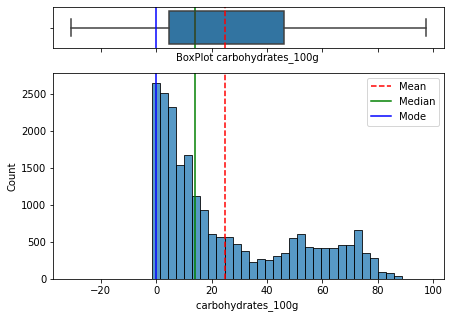

In [56]:
#Choisir l'échantillon avec une distribution acceptable

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

list_df = [df_out]

for df in list_df : 
    mean=df['carbohydrates_100g'].mean()
    median=df['carbohydrates_100g'].median()
    mode=df['carbohydrates_100g'].mode().values[0]

    sns.boxplot(data=df, x="carbohydrates_100g", ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')
    
    sns.histplot(data=df, x="carbohydrates_100g")
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
    
ax_hist.legend()
ax_hist.set(xlabel='carbohydrates_100g ')
ax_box.set(xlabel='BoxPlot carbohydrates_100g ')
plt.show()

In [7]:
df_class3_sample = pd.read_csv("openfoodfacts_sample.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
print("df_class3_sample:", df_class3_sample.shape) # (58680, 19)

df_class3_sample: (49248, 19)


<AxesSubplot:>

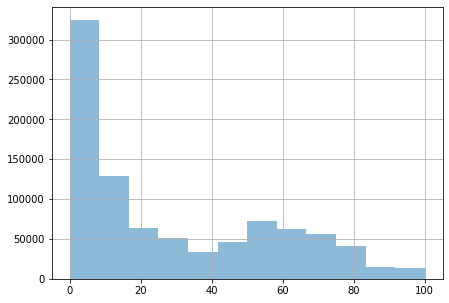

In [57]:
#Vérification distribution Avant Echantillonage
df_class3["carbohydrates_100g"].hist(alpha=0.5, bins=12, range = (0,100))

<AxesSubplot:>

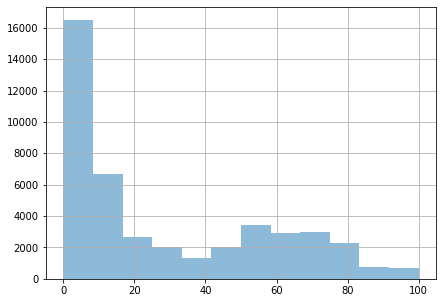

In [58]:
#Après Echantillonnage
df_class3_sample["carbohydrates_100g"].hist(alpha=0.5, bins=12, range = (0,100))

<AxesSubplot:>

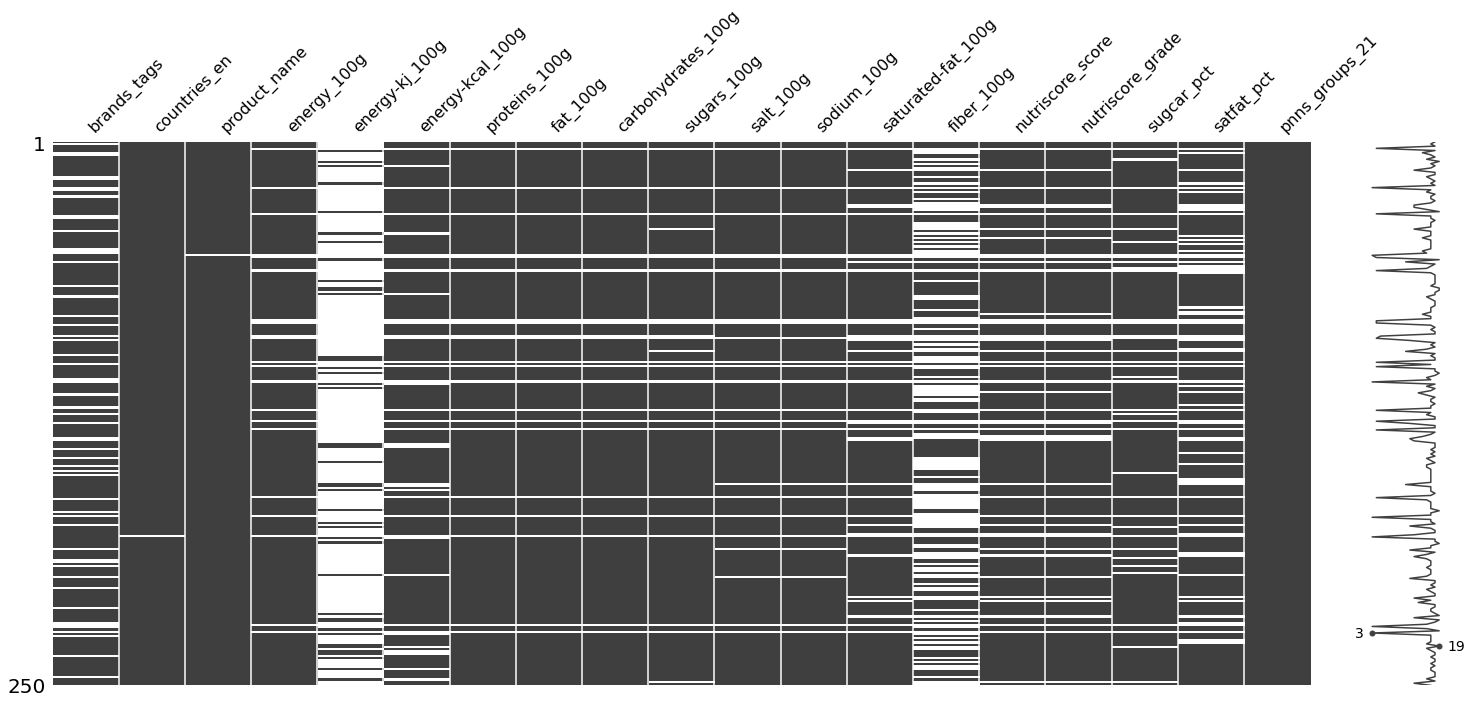

In [59]:
import missingno as msno
%matplotlib inline
#patterns in data 
msno.matrix(df_class3_sample.sample(250))

<AxesSubplot:>

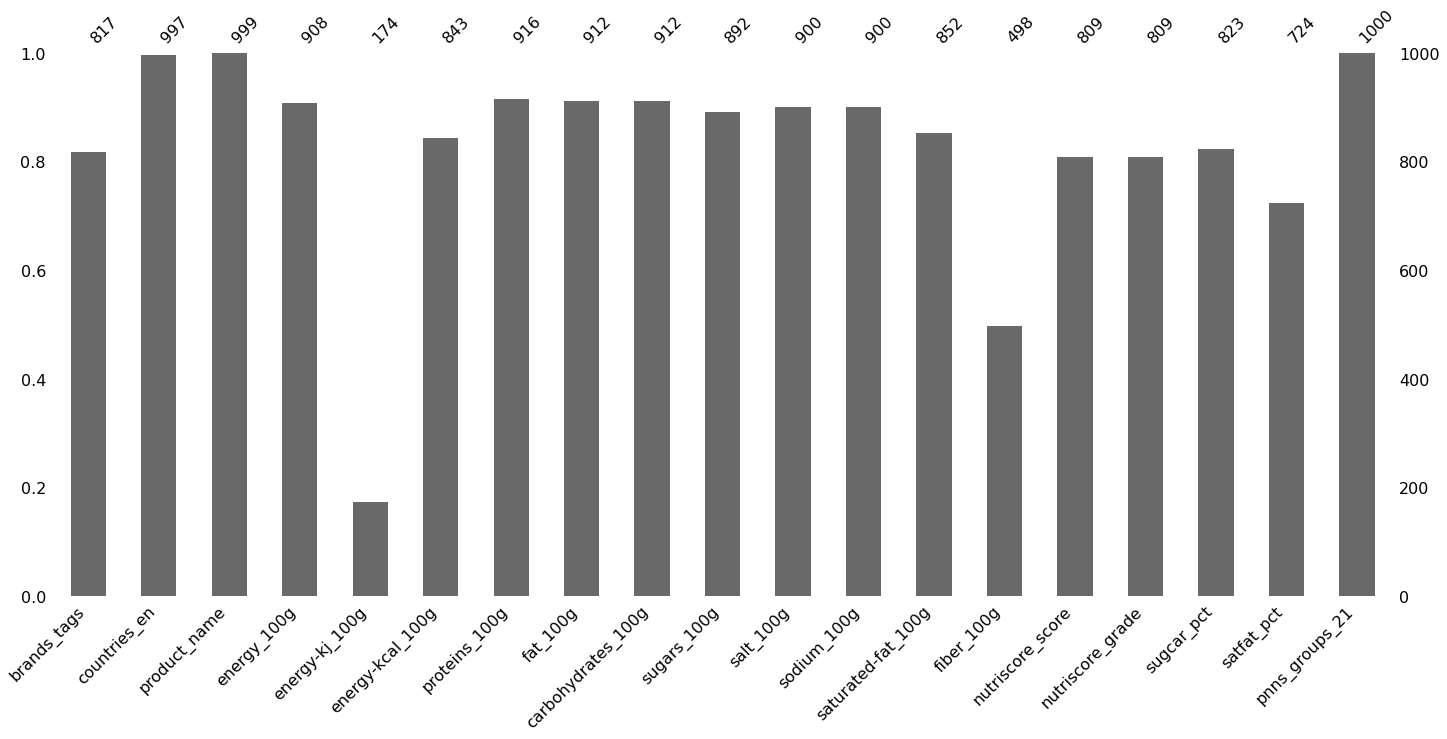

In [60]:
# visualization of nullity by column
msno.bar(df_class3_sample.sample(1000))

<AxesSubplot:>

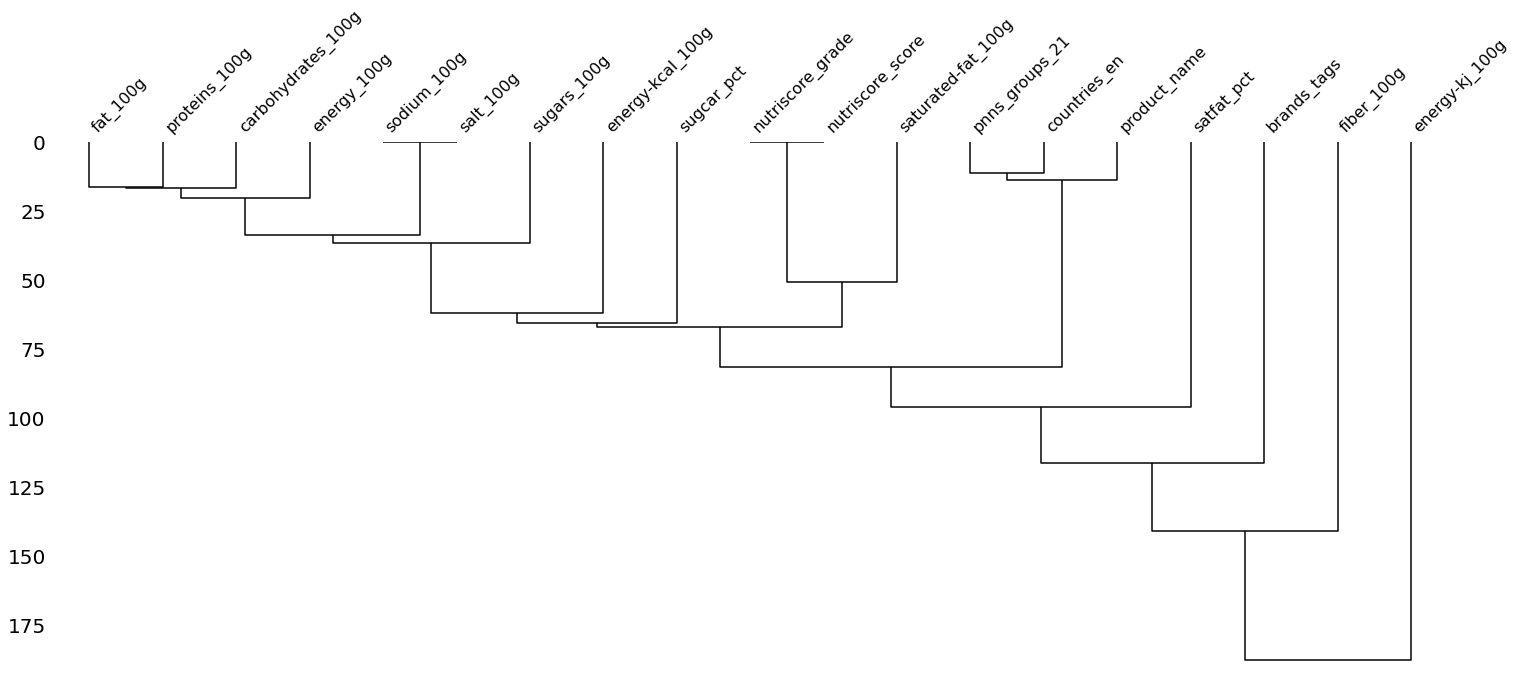

In [61]:
# Dendongramme
msno.dendrogram(df_class3_sample)

In [62]:
df_class3_imputed = df_class3_sample

In [63]:
#Remplacement des colonnes
df_class3_imputed.reset_index(drop=True, inplace=True)
df_class3_imputed.loc[df_class3_imputed.index.isin(df_num.index), [ 'energy_100g', 'energy-kj_100g',
       'energy-kcal_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g',
       'fiber_100g', 'sugcar_pct',
       'satfat_pct']] = df_num[[ 'energy_100g', 'energy-kj_100g',
       'energy-kcal_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g',
       'fiber_100g',  'sugcar_pct',
       'satfat_pct']]


<AxesSubplot:>

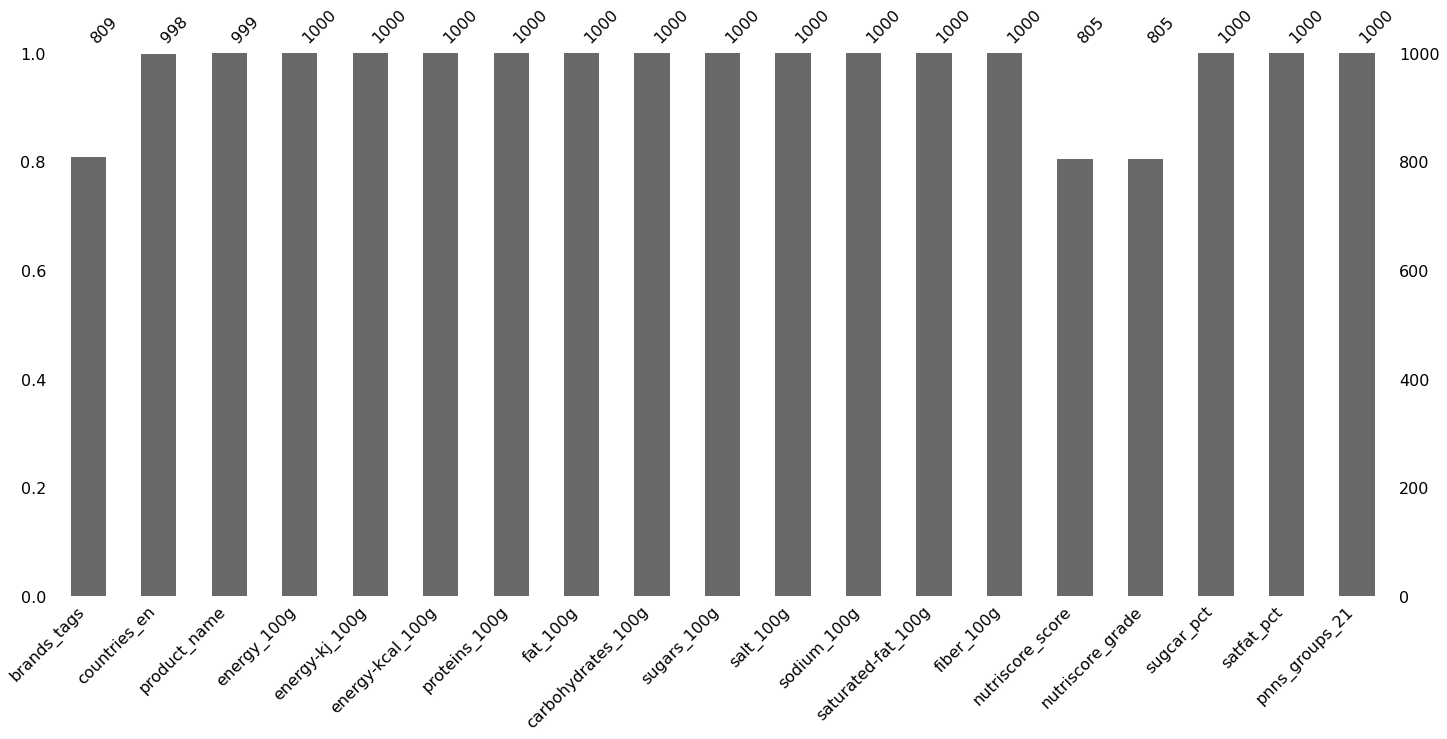

In [65]:
# Afin de garder les Imputations ci-dessus
df_class3_imputed = pd.read_csv("openfoodfacts_imputed.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 

df_class3_imputed.shape
msno.bar(df_class3_imputed.sample(1000))

In [64]:
df_class3_imputed.to_csv("openfoodfacts_imputed.csv",sep="\t",encoding='utf-8',index=False)

In [66]:
df_class4 = df_class3_imputed

<AxesSubplot:>

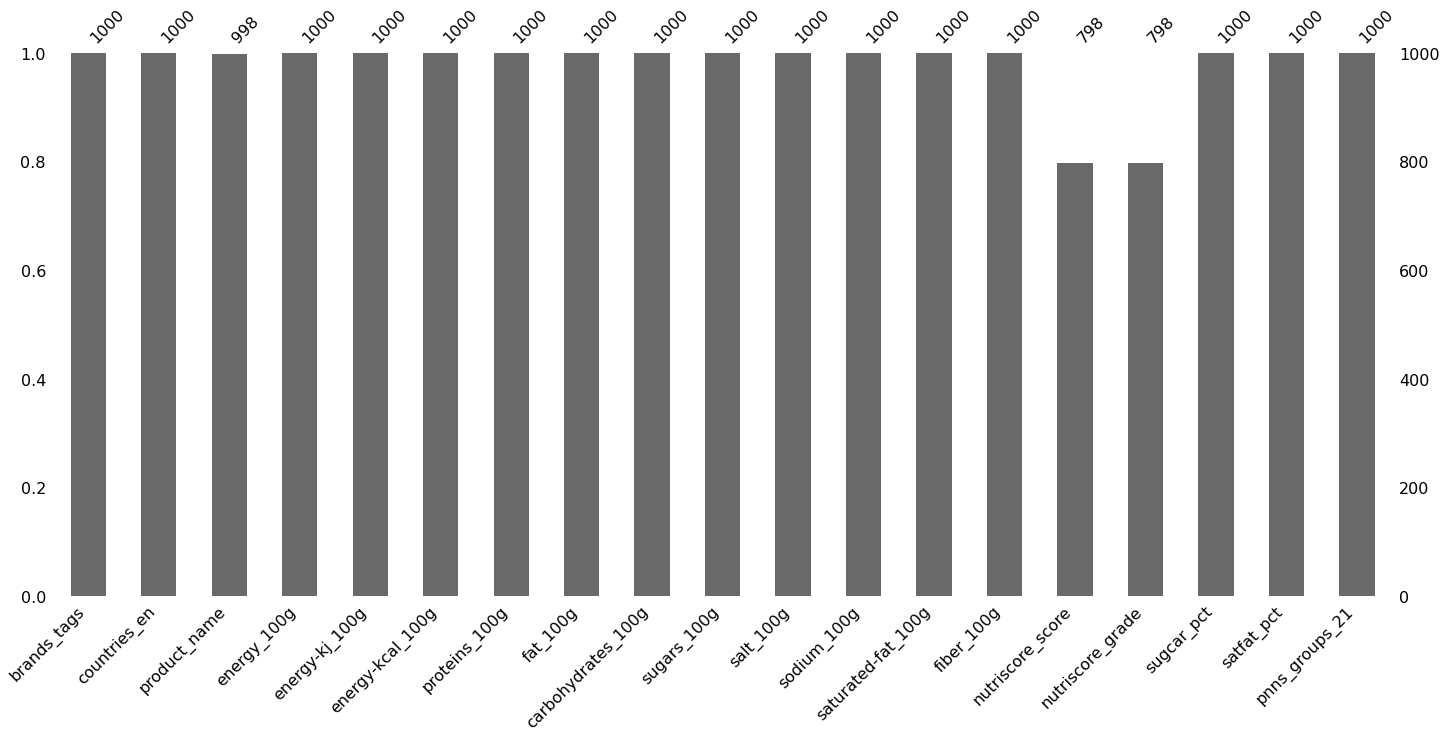

In [67]:
from sklearn.impute import SimpleImputer

#df_class4[["brands_tags"]] =  df_class4[["brands_tags"]].astype("category") 

imputer = SimpleImputer(missing_values= np.nan, strategy="constant") #car sinon ca change trop la distribution
df_class4[["brands_tags"]] = pd.DataFrame(imputer.fit_transform(df_class4[["brands_tags"]]), columns=['brands_tags'])

msno.bar(df_class4.sample(1000))

energy_100g    8.37e-03
intercept     -5.87e-01
dtype: float64


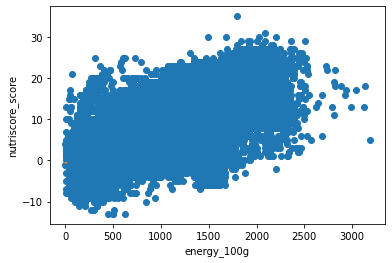

In [68]:
import statsmodels.api as sm


energy_pos = df_class4[df_class4.energy_100g > 0]
Q1 = energy_pos.quantile(0.25)
Q3 = energy_pos.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

# Suppression des outliers extêmes 
df_out4 = energy_pos[~((energy_pos < (Q1 - 1.5 * IQR)) |(energy_pos > (Q3 + 1.5 * IQR))).any(axis=1)]


df_out4_dna = df_out4[['energy_100g','nutriscore_score']].dropna(axis=0, how='any')

X = df_out4_dna[['energy_100g']]
Y = df_out4_dna['nutriscore_score']

X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.



result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['energy_100g'],result.params['intercept']

print(result.params)



plt.plot(df_out4_dna.energy_100g,df_out4_dna.nutriscore_score, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("energy_100g")
plt.ylabel("nutriscore_score")
plt.show()

#import scipy.stats as st
#st.pearsonr(df_out5_dna["energy_100g"], df_out5_dna["nutriscore_score"])[0]
#0.6166325589849385
#
#coeff_determination = (st.pearsonr(df_out5_dna["energy_100g"], df_out5_dna["nutriscore_score"])[0])** 2
#0.38023571280031365

In [ ]:
#imputation des NaN par la regression lineaire
coeffs = {
    "cas 1" : {'a': 8.37e-03 , 'b':-5.87e-01}
    
}


lignes_modifiees = []

for (i,individu) in df_class4.iterrows(): # pour chaque individu de iris,...
    
    if pd.isnull(individu["nutriscore_score"]):
        #espece = individu["species"]
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        #espece = individu["species"]
       
        
        X = individu["energy_100g"]
        Y = a*X + b
        
        df_class4.loc[i,"nutriscore_score"] = Y 
        lignes_modifiees.append(i)
        
        print("On a complété nutriscore_score par {}  et de energy_100g={}".format(Y,X))
        
#print(df_class4.loc[lignes_modifiees])
 

<AxesSubplot:>

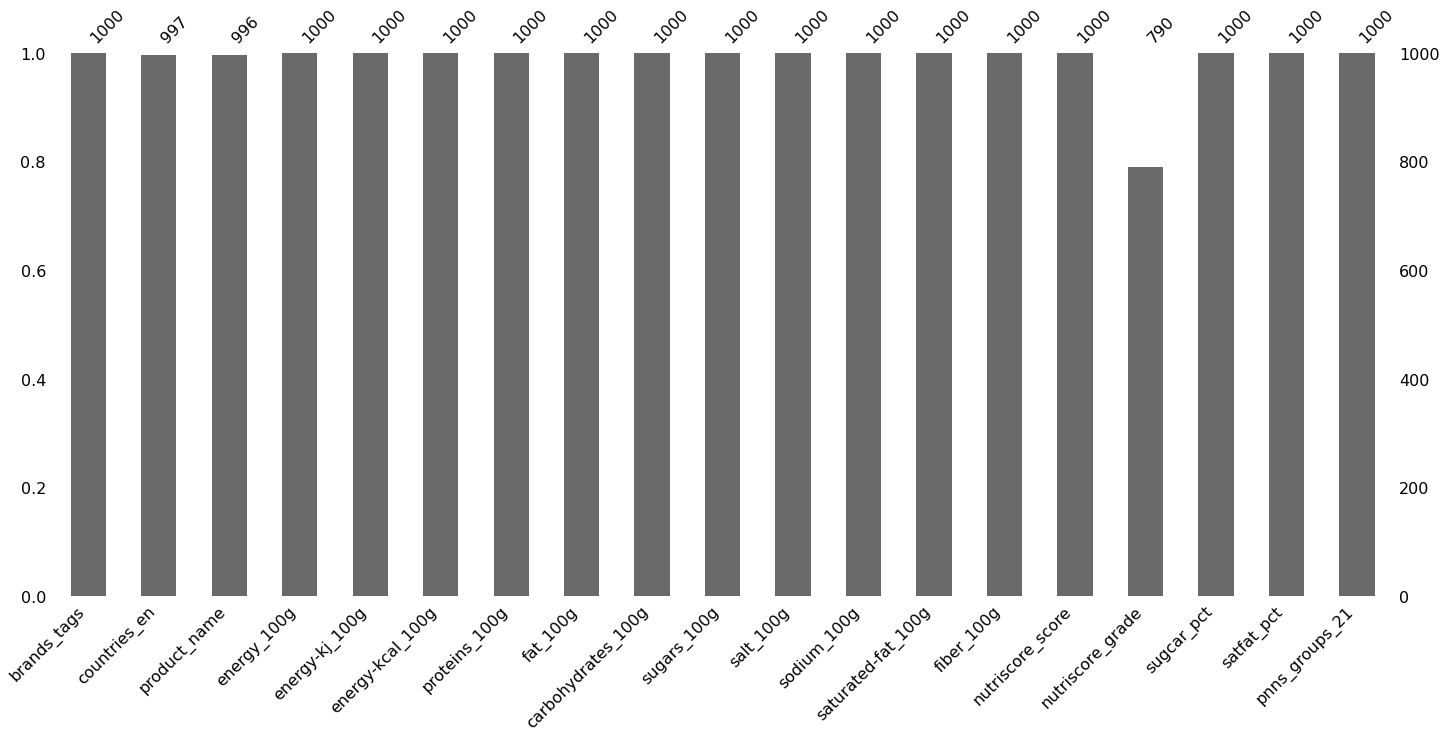

In [71]:
msno.bar(df_class4.sample(1000))

In [72]:
df_class4.to_csv("openfoodfacts_imputed1.csv",sep="\t",encoding='utf-8',index=False)

In [75]:
df_class4.shape

(49248, 19)

In [113]:
df_class4 = pd.read_csv("openfoodfacts_imputed1.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
df_class5 = df_class4

def nutrigrade_food(score):
    for string in df_class5[df_class5['nutriscore_grade'].isna()]["pnns_groups_21"] :
    
        if   "waters" in string  or  score <= -1:
             grade ='a'
        elif score in list(range(0,3)):
             grade ='b'
        elif score in list(range(3,11)) :
             grade ='c'
        elif score in list(range(11,19))  :
             grade ='d'
        elif score >=19:
             grade ='e'
          
        elif "beverages" in string  and score <= 1:
             grade ='b'
        elif "beverages" in string  and score in list(range(2,6))  :
             grade ='c'
        elif "beverages" in string  and score in list(range(6,10)) :
             grade ='d'
        elif "beverages" in string  and score >=10:
             grade ='e'
        
        else :
            grade ='NaN'
        return grade
            
# nutrigrade(24)
df_class5['nutriscore_grade'] = df_class5['nutriscore_score'].astype(int).apply(nutrigrade_food)

In [74]:
df_class5[df_class5["pnns_groups_21"].str.contains("waters")]["pnns_groups_21"].nunique()

1

<AxesSubplot:>

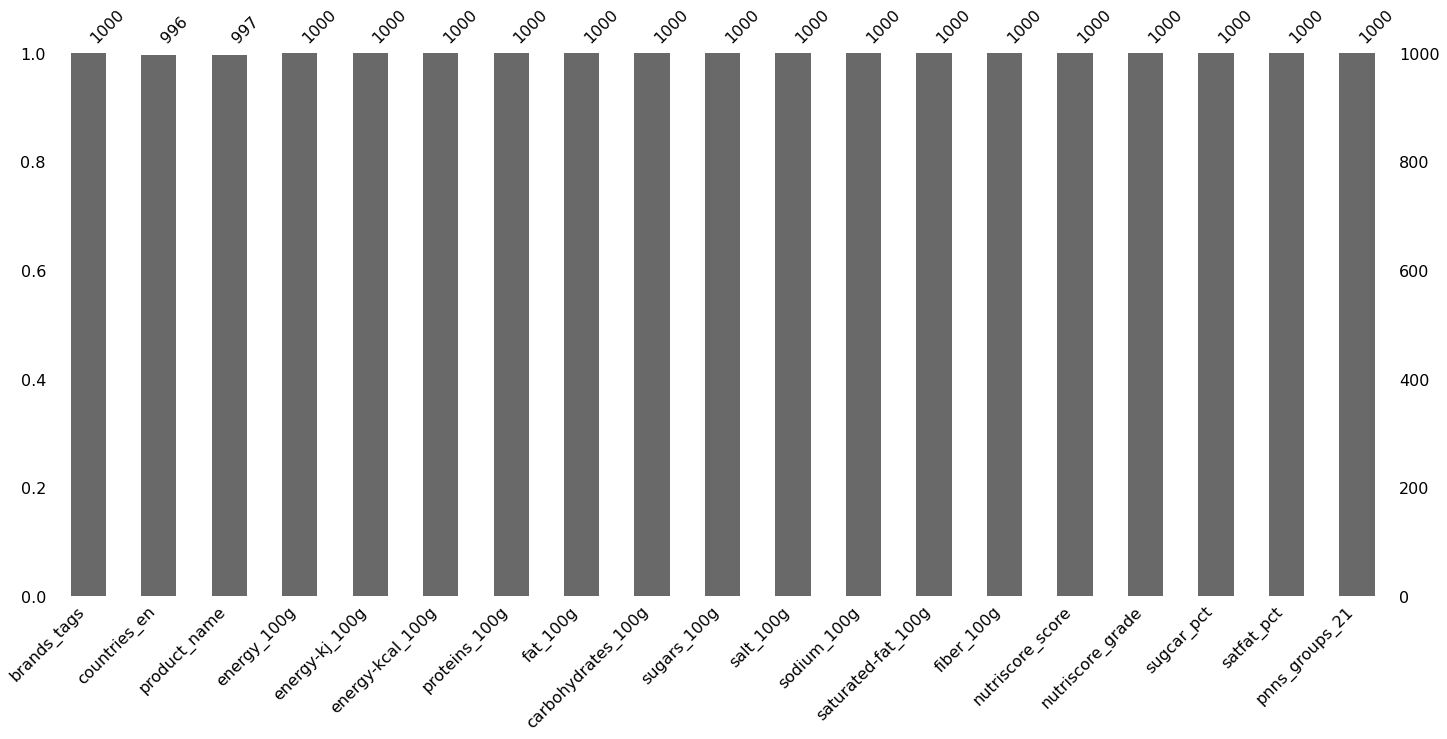

In [114]:
msno.bar(df_class5.sample(1000))

In [115]:
df_class5.head()

,brands_tags,countries_en,product_name,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,fiber_100g,nutriscore_score,nutriscore_grade,sugcar_pct,satfat_pct,pnns_groups_21
0,grimbergen,France,Grimbergen - 33cl grimbergen ambree - 6.50 deg...,239.00,239.00,57.00,0.50,0.10,4.40,0.80,0.01,4.00e-03,0.00,0.72,1.41,b,0.18,0.00,Alcoholic beverages
1,missing_value,Spain,Classic cosmopolitan non-alcoholic cocktail mi...,498.00,498.00,119.00,0.00,0.00,29.66,28.81,0.00,0.00e+00,0.00,0.00,3.58,c,0.97,41.64,Alcoholic beverages
2,hangtime,Switzerland,Hangtime Pinot Noir,1114.40,1114.40,271.82,7.65,13.22,28.67,14.39,1.15,4.61e-01,5.18,2.28,8.74,c,0.61,17.08,Alcoholic beverages
3,missing_value,France,Blenbeb Scotch Whisky,1112.75,1112.75,271.43,7.64,13.23,28.68,14.41,0.00,0.00e+00,5.18,2.28,8.73,c,0.61,17.08,Alcoholic beverages
4,missing_value,Switzerland,Classic lime the original margarita mix,385.00,385.00,92.00,0.00,0.00,23.33,20.00,0.12,4.60e-02,0.57,0.79,2.64,b,0.86,36.61,Alcoholic beverages


In [116]:
#mettre les parametres pour que ca fonctionne
df_class5.to_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8',index=False)

In [117]:
df_class5.shape

(49248, 19)

## Vérification avant et après imputation 

### Variables quantitatives

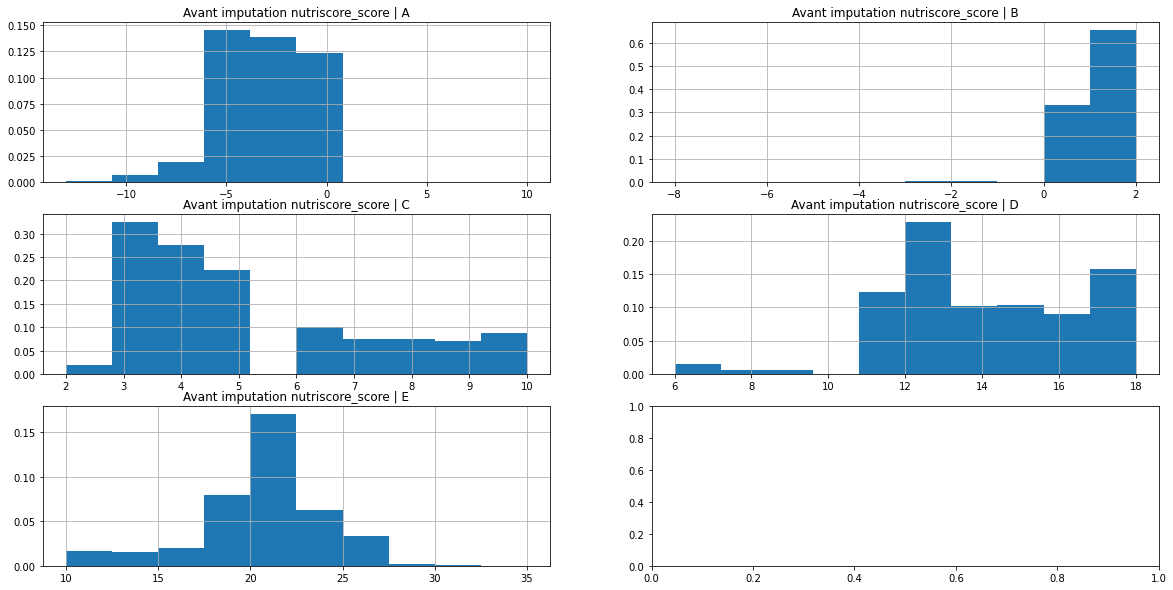

<Figure size 1440x720 with 0 Axes>

In [84]:
plt.rcParams['figure.figsize'] = (20, 10) #(L,l)

#Avant imputation
df_class3_imputed = pd.read_csv("openfoodfacts_imputed.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 

Q1 = df_class3_imputed.quantile(0.25)
Q3 = df_class3_imputed.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Suppression des outliers extêmes 
df_out = df_class3_imputed[~((df_class3_imputed < (Q1 - 1.5 * IQR)) |(df_class3_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]

figure, axes = plt.subplots(3, 2)
ax1 = df_out[df_out["nutriscore_grade"] == 'a']["nutriscore_score"].hist(ax=axes[0,0],density=True)
ax1.set_title("Avant imputation nutriscore_score | A")
ax2 = df_out[df_out["nutriscore_grade"] == 'b']["nutriscore_score"].hist(ax=axes[0,1],density=True)
ax2.set_title("Avant imputation nutriscore_score | B")
ax3 = df_out[df_out["nutriscore_grade"] == 'c']["nutriscore_score"].hist(ax=axes[1,0],density=True)
ax3.set_title("Avant imputation nutriscore_score | C")
ax4 = df_out[df_out["nutriscore_grade"] == 'd']["nutriscore_score"].hist(ax=axes[1,1],density=True)
ax4.set_title("Avant imputation nutriscore_score | D")
ax5 = df_out[df_out["nutriscore_grade"] == 'e']["nutriscore_score"].hist(ax=axes[2,0],density=True)
ax5.set_title("Avant imputation nutriscore_score | E")
plt.figure();

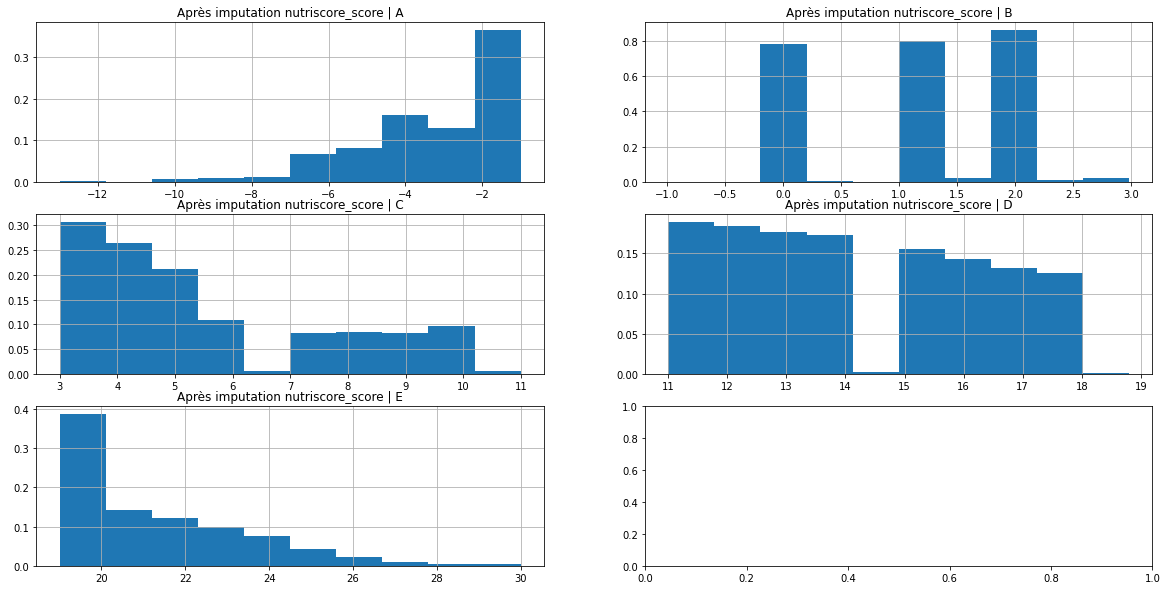

<Figure size 1440x720 with 0 Axes>

In [85]:
plt.rcParams['figure.figsize'] = (20, 10) #(L,l)

#après imputation
df_class5 = pd.read_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 

Q1 = df_class5.quantile(0.25)
Q3 = df_class5.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Suppression des outliers extêmes 
df_out = df_class5[~((df_class5 < (Q1 - 1.5 * IQR)) |(df_class5 > (Q3 + 1.5 * IQR))).any(axis=1)]

figure, axes = plt.subplots(3, 2)
ax1 = df_out[df_out["nutriscore_grade"] == 'a']["nutriscore_score"].hist(ax=axes[0,0],density=True)
ax1.set_title("Après imputation nutriscore_score | A")
ax2 = df_out[df_out["nutriscore_grade"] == 'b']["nutriscore_score"].hist(ax=axes[0,1],density=True)
ax2.set_title("Après imputation nutriscore_score | B")
ax3 = df_out[df_out["nutriscore_grade"] == 'c']["nutriscore_score"].hist(ax=axes[1,0],density=True)
ax3.set_title("Après imputation nutriscore_score | C")
ax4 = df_out[df_out["nutriscore_grade"] == 'd']["nutriscore_score"].hist(ax=axes[1,1],density=True)
ax4.set_title("Après imputation nutriscore_score | D")
ax5 = df_out[df_out["nutriscore_grade"] == 'e']["nutriscore_score"].hist(ax=axes[2,0],density=True)
ax5.set_title("Après imputation nutriscore_score | E")
plt.figure();

In [86]:
#Avant Ecahntillonnage
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8') 


Q1 = df_class3.quantile(0.25)
Q3 = df_class3.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

# Suppression des outliers extêmes 
df_out0 = df_class3[~((df_class3 < (Q1 - 1.5 * IQR)) |(df_class3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [87]:
#Avant Imputation 
df_class3_sample = pd.read_csv("openfoodfacts_sample.csv",sep="\t",encoding='utf-8') 


Q1 = df_class3_sample.quantile(0.25)
Q3 = df_class3_sample.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

# Suppression des outliers extêmes 
df_out3 = df_class3_sample[~((df_class3_sample < (Q1 - 1.5 * IQR)) |(df_class3_sample > (Q3 + 1.5 * IQR))).any(axis=1)]

In [88]:
# Après imputation
#df_class5 = pd.read_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
df_class5 = pd.read_csv("openfoodfacts_imputed2_test.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 

Q1 = df_class5.quantile(0.25)
Q3 = df_class5.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

# Suppression des outliers extêmes 
df_out5 = df_class5[~((df_class5 < (Q1 - 1.5 * IQR)) |(df_class5 > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


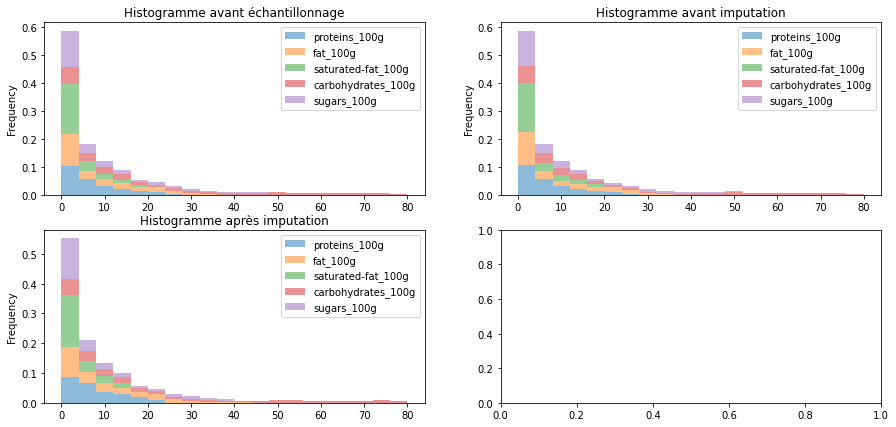

<Figure size 1080x504 with 0 Axes>

In [89]:
plt.rcParams['figure.figsize'] = (15, 7) #(L,h)

figure, axes = plt.subplots(2, 2)

#avant échantillonnage
df0 = pd.DataFrame(df_out0, columns=["proteins_100g","fat_100g","saturated-fat_100g", "carbohydrates_100g", 'sugars_100g'])
ax0= df0.plot.hist(ax=axes[0,0],alpha=0.5,density=True,bins=20, stacked=True, range = (0, 80))
#Avant Imputation 
df1 = pd.DataFrame(df_out3, columns=["proteins_100g","fat_100g","saturated-fat_100g", "carbohydrates_100g", 'sugars_100g']) 
ax1 =df1.plot.hist(ax=axes[0,1],alpha=0.5,density=True,bins=20, stacked=True, range = (0, 80))
# Après imputation
df3 = pd.DataFrame(df_out5, columns=["proteins_100g","fat_100g", "saturated-fat_100g", "carbohydrates_100g", 'sugars_100g'])
ax2=df3.plot.hist(ax=axes[1,0],alpha=0.5,density=True,bins=20, stacked=True, range = (0, 80))

ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")

plt.figure();


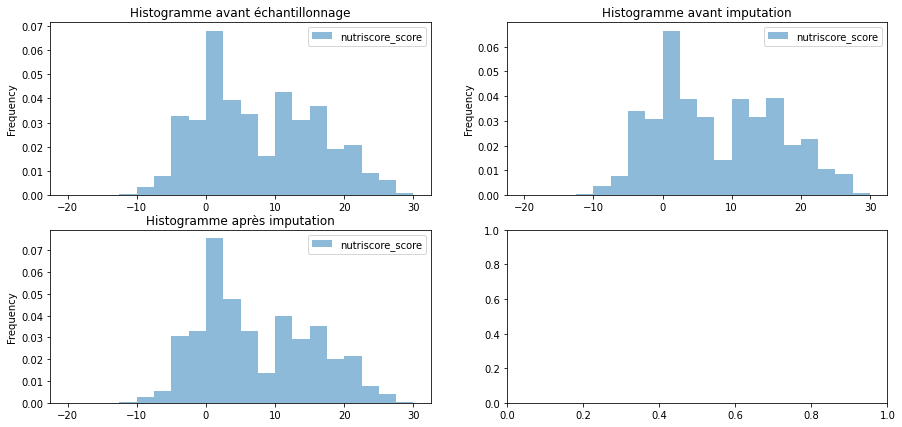

<Figure size 1080x504 with 0 Axes>

In [90]:
plt.rcParams['figure.figsize'] = (15, 7)

figure, axes = plt.subplots(2, 2)

#avant échantillonnage
df0 = pd.DataFrame(df_out0, columns=["nutriscore_score"])
ax0 = df0.plot.hist(ax=axes[0,0],alpha=0.5,density=True,bins=20, range = (-20, 30))

#avant imputation
df1 = pd.DataFrame(df_out3, columns=["nutriscore_score"])
ax1 = df1.plot.hist(ax=axes[0,1],alpha=0.5,density=True,bins=20, range = (-20, 30))


#après imputation
df2 = pd.DataFrame(df_out5, columns=["nutriscore_score"])
ax2 = df2.plot.hist(ax=axes[1,0],alpha=0.5,density=True,bins=20, range = (-20, 30))


ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")


plt.figure();


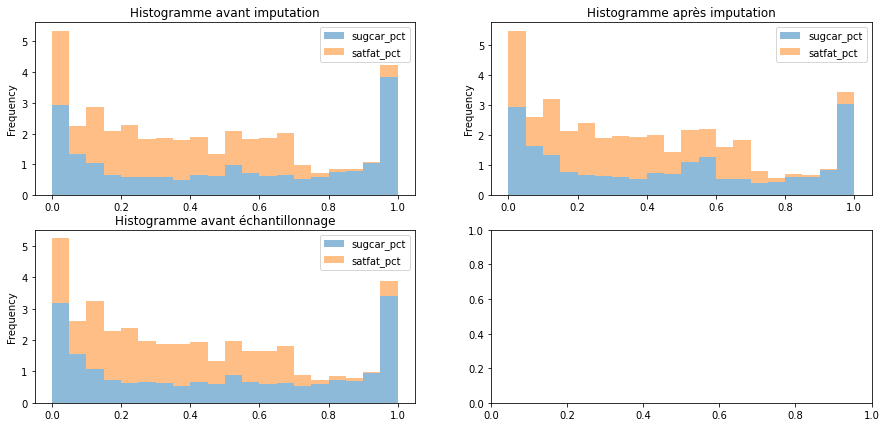

<Figure size 1080x504 with 0 Axes>

In [91]:
plt.rcParams['figure.figsize'] = (15, 7)


figure, axes = plt.subplots(2, 2)

#avant échantillonnage
df0= pd.DataFrame(df_out0, columns=["sugcar_pct","satfat_pct"])
ax0 = df0.plot.hist(ax=axes[1,0],alpha=0.5,density=True,bins=20, stacked=True, range = (0, 1))
#avant imputation
df1= pd.DataFrame(df_out3, columns=["sugcar_pct",'satfat_pct'])
ax1 = df1.plot.hist(ax=axes[0,0],alpha=0.5,density=True,bins=20, stacked=True, range = (0, 1))
#après imputation
df2= pd.DataFrame(df_out5, columns=["sugcar_pct",'satfat_pct'])
ax2 = df2.plot.hist(ax=axes[0,1],alpha=0.5,density=True,bins=20, stacked=True, range = (0, 1))

ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")



plt.figure();

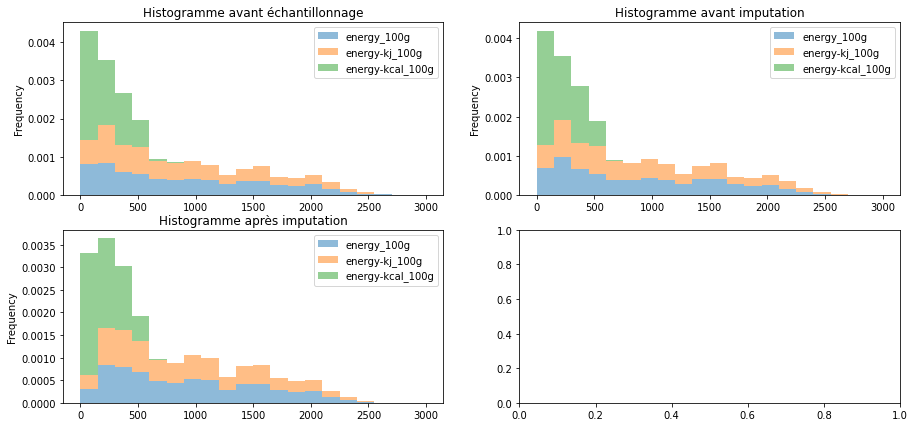

<Figure size 1080x504 with 0 Axes>

In [92]:
plt.rcParams['figure.figsize'] = (15, 7) #(L,l)



figure, axes = plt.subplots(2, 2)

#avant échantillonnage
df0 = pd.DataFrame(df_out0, columns=["energy_100g", "energy-kj_100g", "energy-kcal_100g"])
ax0 = df0.plot.hist(ax=axes[0,0],alpha=0.5,density=True,bins=20, stacked=True, range = (0,3000))

#Avant imputation
df1 = pd.DataFrame(df_out3, columns=["energy_100g", "energy-kj_100g", "energy-kcal_100g"])
ax1 = df1.plot.hist(ax=axes[0,1],alpha=0.5,density=True,bins=20, stacked=True, range = (0,3000))
#Après imputation
df2 = pd.DataFrame(df_out5, columns=["energy_100g", "energy-kj_100g", "energy-kcal_100g"])
ax2 = df2.plot.hist(ax=axes[1,0],alpha=0.5,density=True,bins=20, stacked=True, range = (0,3000))

ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")

plt.figure();

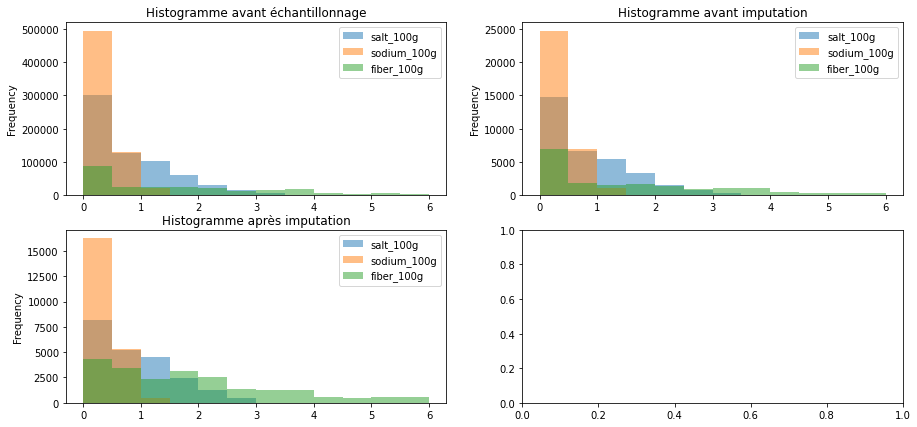

<Figure size 1080x504 with 0 Axes>

In [93]:
figure, axes = plt.subplots(2, 2)

#avant échantillonnage
df0 = pd.DataFrame(df_out0, columns=["salt_100g", "sodium_100g", "fiber_100g"])
ax0 = df0.plot.hist(ax=axes[0,0],alpha=0.5, bins=12, range = (0,6))
#Avant imputation
df1 = pd.DataFrame(df_out3, columns=["salt_100g", "sodium_100g", "fiber_100g"])
ax1 = df1.plot.hist(ax=axes[0,1],alpha=0.5, bins=12, range = (0,6))
#Aprèa imputation
df2 = pd.DataFrame(df_out5, columns=["salt_100g", "sodium_100g", "fiber_100g"])
ax2=df2.plot.hist(ax=axes[1,0],alpha=0.5, bins=12, range = (0,6))

ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")

plt.figure();

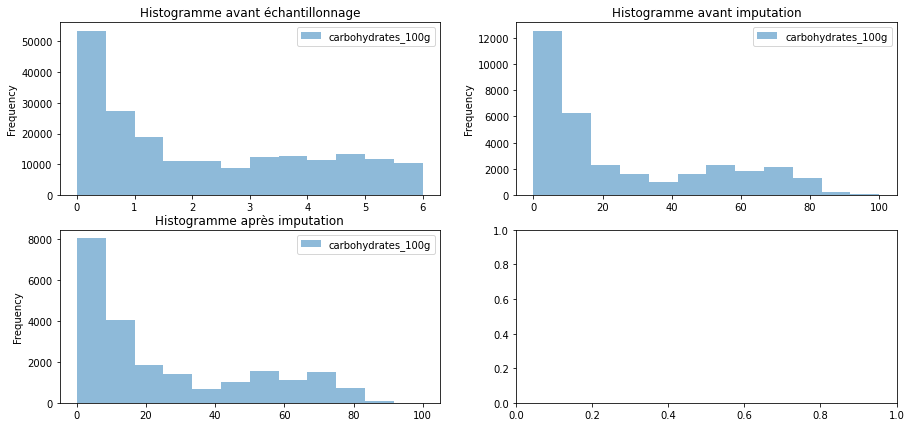

<Figure size 1080x504 with 0 Axes>

In [94]:
figure, axes = plt.subplots(2, 2)


#avant échantillonnage
df0 = pd.DataFrame(df_out0, columns=["carbohydrates_100g"])
ax0 = df0.plot.hist(ax=axes[0,0],alpha=0.5, bins=12, range = (0,6))

#Avant imputation
df1 = pd.DataFrame(df_out3, columns=["carbohydrates_100g"])
ax1 = df1.plot.hist(ax=axes[0,1],alpha=0.5, bins=12, range = (0,100))
#Après Imputation
df2 = pd.DataFrame(df_out5, columns=["carbohydrates_100g"])
ax2 = df2.plot.hist(ax=axes[1,0],alpha=0.5, bins=12, range = (0,100))

ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")



plt.figure();

### Variables qualitatitives

In [95]:
#Après imputation
df_class5 = pd.read_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 

df_qual = df_class5.select_dtypes(include=['object'])
df_qual.nunique()

brands_tags         15406
countries_en          267
product_name        44862
nutriscore_grade        5
pnns_groups_21         44
dtype: int64

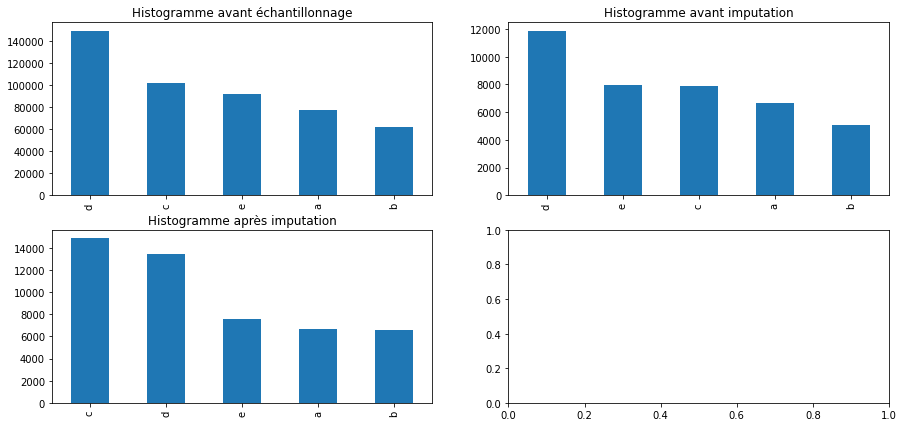

<Figure size 1080x504 with 0 Axes>

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=2)


#avant échantillonnage
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
ax0=df_class3["nutriscore_grade"].value_counts(normalize=False).plot(ax=axes[0,0],kind='bar')
#Avant imputation
df_class4 = pd.read_csv("openfoodfacts_imputed1.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
ax1=df_class3_sample["nutriscore_grade"].value_counts(normalize=False).plot(ax=axes[0,1],kind='bar')
#Après imputation
ax2=df_class5["nutriscore_grade"].value_counts(normalize=False).plot(ax=axes[1,0],kind='bar')

ax0.set_title("Histogramme avant échantillonnage")
ax1.set_title("Histogramme avant imputation")
ax2.set_title("Histogramme après imputation")

plt.figure();
#note même résultat avec iterative imputer ou regression lineaire

Text(0.5, 1.0, 'Pie Chart après imputation')

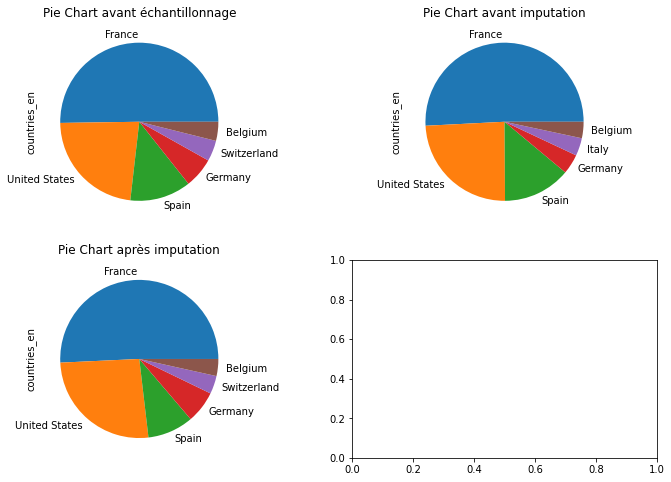

In [97]:
plt.rcParams['figure.figsize'] = (12,8) #(L,l)
fig, axes = plt.subplots(nrows=2, ncols=2)



#avant échantillonnage
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
ax0=df_class3["countries_en"].value_counts(normalize=False).iloc[:6,].plot(ax=axes[0,0],kind='pie')
#Avant imputation
df = pd.read_csv("openfoodfacts_colonnes.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
ax1=df["countries_en"].value_counts(normalize=False).iloc[:6,].plot(ax=axes[0,1],kind='pie')
#Après imputation
ax2=df_class5["countries_en"].value_counts(normalize=False).iloc[:6,].plot(ax=axes[1,0],kind='pie')

ax0.set_title("Pie Chart avant échantillonnage")
ax1.set_title("Pie Chart avant imputation")
ax2.set_title("Pie Chart après imputation")

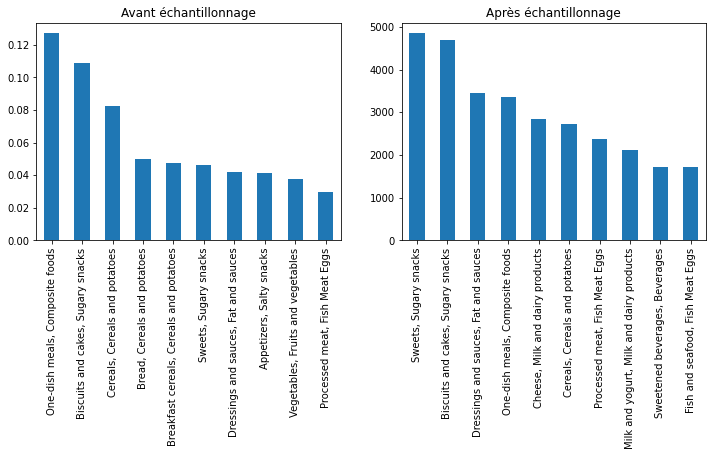

<Figure size 864x288 with 0 Axes>

In [108]:
plt.rcParams['figure.figsize'] = (12,4) #(L,l)
fig, axes = plt.subplots(nrows=1, ncols=2)


#avant échantillonnage
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8')
df_class3_dna = df_class3.dropna(axis=0, how='any')
ax0=df_class3_dna["pnns_groups_21"].value_counts(normalize=True).iloc[:10,].plot(ax=axes[0],kind='bar')
#Après echantillonnage
df_class3_sample = pd.read_csv("openfoodfacts_sample.csv",sep="\t",encoding='utf-8')
ax1=df_class3_sample["pnns_groups_21"].value_counts(normalize=False).iloc[:10,].plot(ax=axes[1],kind='bar')

ax0.set_title("Avant échantillonnage")
ax1.set_title("Après échantillonnage")

plt.figure();

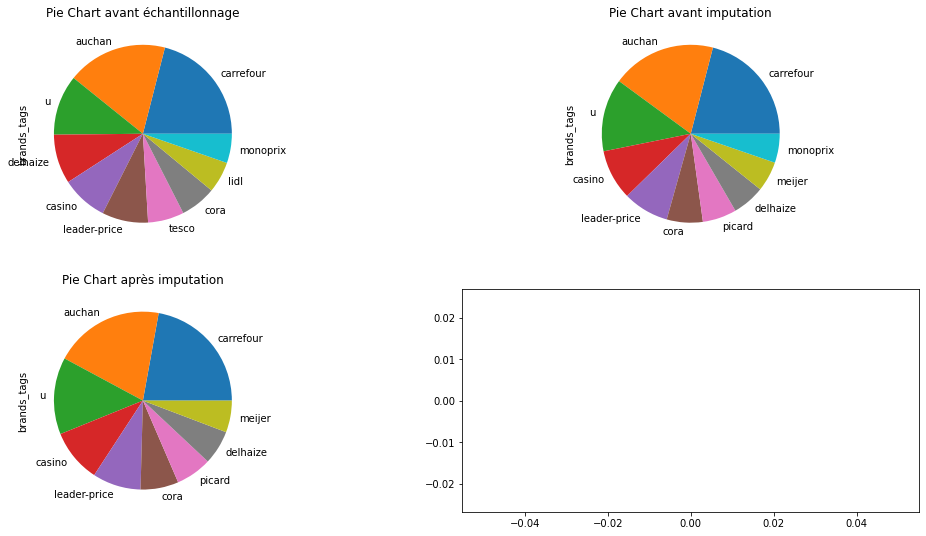

In [109]:
plt.rcParams['figure.figsize'] = (18,9) #(L,l)

fig, axes = plt.subplots(nrows=2, ncols=2)


#Avant échantillonnage
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8')
#df_class3_dna = df_class3.dropna(axis=0, how='any')
ax0 = df_class3["brands_tags"].value_counts(normalize=False).iloc[0:10,].plot(ax=axes[0,0], kind='pie')


#Avant Imputation
df_class3_imputed = pd.read_csv("openfoodfacts_imputed.csv",sep="\t",encoding='utf-8')
ax1 = df_class3_imputed["brands_tags"].value_counts(normalize=False).iloc[0:10,].plot(ax=axes[0,1], kind='pie')


#Après imputation en "missing_value"
df_class4 = pd.read_csv("openfoodfacts_imputed1.csv",sep="\t",encoding='utf-8')
ax2 = df_class4["brands_tags"].value_counts(normalize=False).iloc[1:10,].plot(ax=axes[1,0], kind='pie')

ax0.set_title("Pie Chart avant échantillonnage")
ax1.set_title("Pie Chart avant imputation")
ax2.set_title("Pie Chart après imputation")

plt.axis('equal') 
plt.show()

<AxesSubplot:>

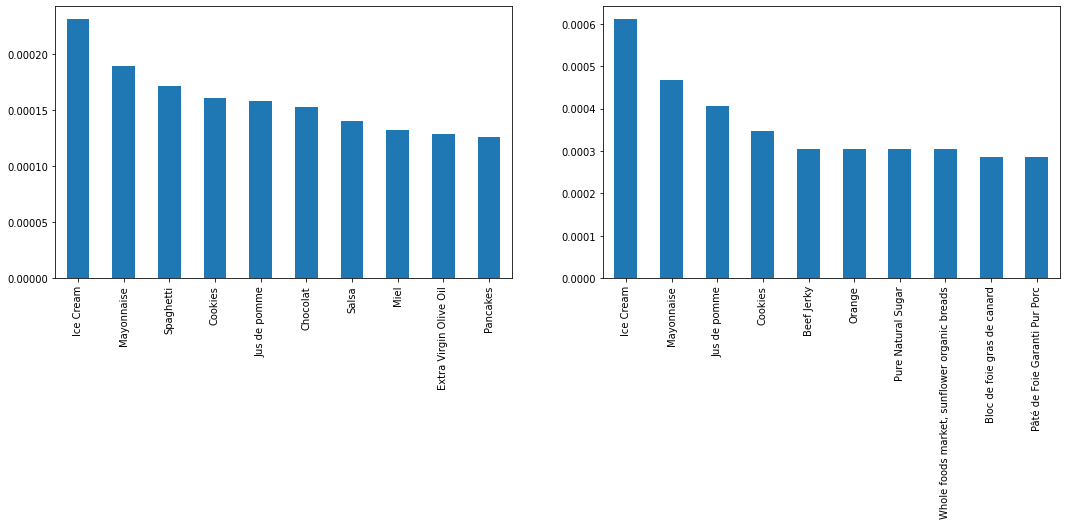

In [110]:
plt.rcParams['figure.figsize'] = (18,5) 
ig, axes = plt.subplots(nrows=1, ncols=2)

#Avant echantillonnage
df_class3 = pd.read_csv("openfoodfacts_nettoyage1.csv",sep="\t",encoding='utf-8')
df_class3["product_name"].value_counts(normalize=True).sort_values(ascending=False).iloc[:10,].plot(ax=axes[0],kind='bar')

#Apres echantillonnage
df_class3_sample = pd.read_csv("openfoodfacts_sample.csv",sep="\t",encoding='utf-8')
df_class3_sample["product_name"].value_counts(normalize=True).sort_values(ascending=False).iloc[:10,].plot(ax=axes[1], kind='bar') 